<a href="https://colab.research.google.com/github/gna-rus/EXP_analysis/blob/main/EXP_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [434]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [435]:
df = pd.read_excel('/content/drive/MyDrive/for_EXP/Merge_RC_TFT_and_OPTIC.xlsx')
df

,Unnamed: 0,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square,res_mean_on_glass_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,result_SD1-E-CD,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD,X_square,Y_square
0,46956,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.522920,0.148,4.652,1.0,6.01892,NaN,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
1,46957,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.522920,0.148,4.652,NaN,6.01892,1.0,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
2,46958,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.522920,0.148,4.652,NaN,6.01892,NaN,1.077,6.023,4.81804,1.0,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
3,46959,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.522920,0.148,4.652,NaN,6.01892,NaN,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,1.0,0.037,5.463,85000,190000
4,46960,13506,EXP80-1,X9-Y19,NaN,VIA SD-GATE,NaN,NaN,2.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.522920,0.148,4.652,1.0,6.01892,NaN,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38995,307,3243,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",5.273909,-0.046,4.846,NaN,5.05692,NaN,1.600,5.500,4.90960,NaN,0.094,5.006,5.269174,1.0,-0.112,5.612,350000,100000
38996,308,3244,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",5.273909,-0.046,4.846,1.0,5.05692,NaN,1.600,5.500,4.90960,NaN,0.094,5.006,5.269174,NaN,-0.112,5.612,350000,100000
38997,309,3244,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",5.273909,-0.046,4.846,NaN,5.05692,1.0,1.600,5.500,4.90960,NaN,0.094,5.006,5.269174,NaN,-0.112,5.612,350000,100000
38998,310,3244,EXP69-3,X35-Y35,NaN,IGZO Serpentine,NaN,NaN,NaN,1366440.0,Reference 4 +SiNx 200nm,347224,128816,Nominal,-0.200719,0.399802,4.444670e-07,0.145959,NaN,30.84,29.59,"350000,100000",5.273909,-0.046,4.846,NaN,5.05692,NaN,1.600,5.500,4.90960,1.0,0.094,5.006,5.269174,NaN,-0.112,5.612,350000,100000


In [436]:
# df[(df['Lot-panel'] == 'EXP80-1') & (df['Num_of_square'] == '85000,190000')].head(30)

In [437]:
df = df.rename(columns={"Unnamed: 0": "my_id"})

# **Обучающая и тестовая выборка**

In [438]:
# Создаю выборки для настройки модели (использую только данные с Description == Reference 4 +SiNx 200nm	из первичных данных)
small_df, train = train_test_split(df,train_size=0.01,random_state=42)
train, val = train_test_split(df,train_size=0.8,random_state=42)
# val, test = train_test_split(test,train_size=0.5,random_state=42)
# train - данные для основного обучения
# test - проверочные данные
# val - данные для финального теста (нужна для того чтобы избежать переобучения)

In [439]:
len(train) / len(df)

0.8

In [468]:
df.head(15)

,my_id,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square,res_mean_on_glass_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,result_SD1-E-CD,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD,X_square,Y_square
0,46956,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.52292,0.148,4.652,1.0,6.01892,NaN,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
1,46957,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.52292,0.148,4.652,NaN,6.01892,1.0,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
2,46958,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.52292,0.148,4.652,NaN,6.01892,NaN,1.077,6.023,4.81804,1.0,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
3,46959,13505,EXP80-1,X9-Y19,NaN,VIA SD-SEMIA,NaN,NaN,735.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.52292,0.148,4.652,NaN,6.01892,NaN,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,1.0,0.037,5.463,85000,190000
4,46960,13506,EXP80-1,X9-Y19,NaN,VIA SD-GATE,NaN,NaN,2.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.52292,0.148,4.652,1.0,6.01892,NaN,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
5,46961,13506,EXP80-1,X9-Y19,NaN,VIA SD-GATE,NaN,NaN,2.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.52292,0.148,4.652,NaN,6.01892,1.0,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
6,46962,13506,EXP80-1,X9-Y19,NaN,VIA SD-GATE,NaN,NaN,2.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.52292,0.148,4.652,NaN,6.01892,NaN,1.077,6.023,4.81804,1.0,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
7,46963,13506,EXP80-1,X9-Y19,NaN,VIA SD-GATE,NaN,NaN,2.0,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.52292,0.148,4.652,NaN,6.01892,NaN,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,1.0,0.037,5.463,85000,190000
8,46964,13507,EXP80-1,X9-Y19,NaN,Line GATE-SEMIA,NaN,51702711.9,NaN,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.52292,0.148,4.652,1.0,6.01892,NaN,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000
9,46965,13507,EXP80-1,X9-Y19,NaN,Line GATE-SEMIA,NaN,51702711.9,NaN,NaN,Reference 4 +SiNx 200nm,87244,224836,Nominal,-0.900748,0.200385,8.070060e-07,0.347302,1.408571e-13,NaN,NaN,"85000,190000",4.52292,0.148,4.652,NaN,6.01892,1.0,1.077,6.023,4.81804,NaN,0.471,4.629,5.062455,NaN,0.037,5.463,85000,190000


In [548]:
# Создаю список фичей
all = ['my_id', 'index', 'Lot-panel', 'PEM', 'S_Design',
       'Measurement Structure', 'Capasitance', 'Sheet resistance',
       'VIA resistance', 'Resistance', 'Description', 'X', 'Y', 'TFT', 'Von',
       'Hyst', 'Id(Von+3V)', 'SS', 'Ioff', 'Cni', 'Cox', 'Num_of_square',
       'Line', 'res_mean_on_glass_SD1-E-CD',
       'result_SD1-E-CD', 'res_mean_on_glass_VI1-E-CD', 'result_VI1-E-CD',
       'err_result_VI1-E-CD', 'res_mean_on_glass_ME1-E-CD', 'result_ME1-E-CD',
       'err_result_ME1-E-CD', 'res_mean_on_glass_IGZO-E-CD',
       'result_IGZO-E-CD', 'err_result_IGZO-E-CD', 'X_square', 'Y_square']

X_test = [ 'TFT',
          'line_SD1_E_CD', 'line_IGZO_E_CD'
          ]
# , 'line_ME1_E_CD', 'line_VI1_E_CD', 'line_IGZO_E_CD'

# Список категориальных фичей (не числовые)
cat_features = [ 'TFT']

# Целевой признак
Y = ['Von']


# 'Lot-panel', 'TFT', 'Measurement Structure'
#  'err_result_SD1-E-CD',
#           'line_SD1_E_CD', 'result_SD1-E-CD', 'res_mean_on_glass_VI1-E-CD',
#           'result_VI1-E-CD', 'err_result_VI1-E-CD', 'line_VI1_E_CD',
#           'res_mean_on_glass_ME1-E-CD', 'result_ME1-E-CD', 'err_result_ME1-E-CD',
#           'line_ME1_E_CD', 'res_mean_on_glass_IGZO-E-CD',
#           'result_IGZO-E-CD', 'line_IGZO_E_CD'



# 'Lot-panel', 'PEM', 'TFT',  'Sheet resistance', 'VIA resistance', 'Resistance','Hyst', 'Id(Von+3V)', 'SS', 'Ioff', 'Cni', 'Cox', 'Id(Von+3V)', 'SS', 'Ioff', 'Sheet resistance', 'VIA resistance', 'Resistance', 'Cni', 'Cox', 'Hyst'
# 'res_mean_on_glass_SD1-E-CD', 'err_result_SD1-E-CD',
#           'line_SD1_E_CD', 'result_SD1-E-CD', 'res_mean_on_glass_VI1-E-CD',
#           'result_VI1-E-CD', 'err_result_VI1-E-CD', 'line_VI1_E_CD',
#           'res_mean_on_glass_ME1-E-CD', 'result_ME1-E-CD', 'err_result_ME1-E-CD',
#           'line_ME1_E_CD', 'res_mean_on_glass_IGZO-E-CD',




In [442]:
# Команда перегоняющая категориальные значения в двоичный вид, в onehot encoding(наглядное отображение как работать с категориальными данными. Но КэтБУст так не делает, у него свой метод)
pd.get_dummies(df['Lot-panel'])

,EXP69-3,EXP72-4,EXP74-1,EXP74-2,EXP74-3,EXP74-4,EXP75-1,EXP75-2,EXP80-1
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
38995,True,False,False,False,False,False,False,False,False
38996,True,False,False,False,False,False,False,False,False
38997,True,False,False,False,False,False,False,False,False
38998,True,False,False,False,False,False,False,False,False


# **Запуск Кэтбуста**

In [443]:
! pip install catboost

In [444]:
from catboost import CatBoostRegressor
# CatBoostRegressor - если надо предсказать какое-то значение
# CatBoostRanker - используется для ранжирования

In [549]:
# Создаю модель CatBoost (провожу настройку)
model = CatBoostRegressor(cat_features = cat_features,
                          learning_rate = 0.5,
                          iterations=500,
                          depth = 6,
                          early_stopping_rounds = 200,
                          eval_metric = 'MAPE',
                          verbose=100)
# learning_rate =  - коэфициент влияющий на качество обучения каждой итерации (надо настроить так чтобы лучшим обучением было в районе 900, но не больше 999 (из 1000))
# early_stopping_rounds - количество не лучших раундов по достижению которого подряд обучение завершится
# eval_metric='MAPE'/ RMSE - задаю метрику для создания модели (читай документацию, метрик много)
# verbose = 100 - выводить каждую 100 итерацию качества
# random_seed = 42,

In [550]:
# Передаю в модель обучающие данные
model.fit(train[X_test],train[Y], eval_set=(val[X_test],val[Y]))
# model.fit(train[X_test],train[Y], verbose=False)

0:	learn: 0.2834379	test: 0.2827127	best: 0.2827127 (0)	total: 9.17ms	remaining: 4.58s
100:	learn: 0.0157446	test: 0.0160831	best: 0.0160831 (100)	total: 489ms	remaining: 1.93s
200:	learn: 0.0017916	test: 0.0018484	best: 0.0018484 (200)	total: 1.01s	remaining: 1.51s
300:	learn: 0.0001833	test: 0.0001874	best: 0.0001874 (300)	total: 1.52s	remaining: 1s
400:	learn: 0.0000250	test: 0.0000256	best: 0.0000256 (400)	total: 2.01s	remaining: 497ms
499:	learn: 0.0000034	test: 0.0000034	best: 0.0000034 (499)	total: 2.46s	remaining: 0us

bestTest = 3.403055651e-06
bestIteration = 499



# **Предсказание по созданной моделе**

In [551]:
# Делаю предсказание по созданной моделе. В Модель загружается df без целевого параметра, а выводится список искомого параметра по каждой строчке
num = 120
offset = 20
res = model.predict(small_df[X_test])
res_list = list(res)[(num):(num+offset)]
res_list

[-0.100756883959008,
 0.0998500528923784,
 -0.0007510409770107862,
 0.09978352499927579,
 0.09982093241548917,
 0.3002803327601845,
 0.09975647214594849,
 0.3003484890202066,
 0.7001696823209771,
 0.19972322456480512,
 0.8003581920873925,
 0.500267822701877,
 0.3002668087685382,
 0.09976804578981002,
 -0.30079240496604603,
 0.09978721376443378,
 0.30030277497246616,
 -0.30073570708302433,
 0.3003436854091146,
 -0.0007510409770107862]

In [552]:
real_value = small_df.iloc[(num):(num+offset)]
real_value

,my_id,index,Lot-panel,PEM,S_Design,Measurement Structure,Capasitance,Sheet resistance,VIA resistance,Resistance,Description,X,Y,TFT,Von,Hyst,Id(Von+3V),SS,Ioff,Cni,Cox,Num_of_square,res_mean_on_glass_SD1-E-CD,err_result_SD1-E-CD,line_SD1_E_CD,result_SD1-E-CD,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,err_result_VI1-E-CD,line_VI1_E_CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,err_result_ME1-E-CD,line_ME1_E_CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_IGZO-E-CD,line_IGZO_E_CD,X_square,Y_square
32635,1123,3183,EXP69-3,X15-Y45,5500.0,Capacitor GATE-SEMIA,38.1,NaN,NaN,NaN,Reference 4 +SiNx 200nm,147244,68836,Nominal,-0.100747,0.200031,6.172950e-07,0.210310,NaN,30.17,20.40,"145000,90000",5.273909,-1.180,5.980,NaN,5.05692,NaN,2.400,4.700,4.909600,NaN,-0.028,5.128,5.269174,1.0,0.196,5.304,145000,90000
36212,4700,1941,EXP69-3,X16-Y12,22000.0,Capacitor SD-GATE,30.1,NaN,NaN,NaN,Reference 4 +SiNx 200nm,154442,265185,W10L5A,0.099847,0.201163,6.920905e-07,0.118847,NaN,30.10,19.83,"145000,290000",5.273909,-0.170,4.970,1.0,5.05692,NaN,2.500,4.600,4.909600,NaN,0.692,4.408,5.269174,NaN,0.322,5.178,145000,290000
17453,24681,7598,EXP74-2,X9-Y55,NaN,VIA SD-GATE,NaN,NaN,2.0,NaN,Reference 4 +SiNx 200nm,87244,8836,Nominal,-0.000752,0.000126,9.835475e-07,0.340216,2.390569e-13,NaN,NaN,"50000,10000",6.089800,-0.221,5.021,NaN,6.13108,1.0,0.433,6.667,4.912360,NaN,0.342,4.758,5.053714,NaN,0.798,4.702,50000,10000
18589,26441,7774,EXP74-2,X2-Y12,NaN,VIA SD-GATE,NaN,NaN,2.0,NaN,Reference 4 +SiNx 200nm,17252,266766,Nominal,0.099786,0.201183,1.092175e-06,0.322203,2.131702e-13,NaN,NaN,"14000,290000",6.089800,-1.380,6.180,NaN,6.13108,1.0,0.639,6.461,4.912360,NaN,-0.095,5.195,5.053714,NaN,0.412,5.088,14000,290000
8208,42476,11501,EXP74-4,X29-Y27,NaN,Line GATE-SEMIA,NaN,66131694.9,NaN,NaN,Reference 4 +SiNx 200nm,287234,176816,Nominal,0.099821,0.201202,4.411515e-07,0.382443,1.562625e-13,NaN,NaN,"290000,190000",6.143280,-1.473,6.273,0.0,6.12960,NaN,1.032,6.068,4.981320,NaN,0.239,4.861,5.332000,NaN,0.315,5.185,290000,190000
37410,5950,2697,EXP69-3,X8-Y2,22000.0,Capacitor SD-GATE,30.5,NaN,NaN,NaN,Reference 4 +SiNx 200nm,77242,326776,Nominal,0.300279,0.199943,1.101675e-06,0.106968,NaN,30.55,40.67,"85000,290000",5.273909,0.469,4.331,NaN,5.05692,NaN,2.900,4.200,4.909600,1.0,0.045,5.055,5.269174,NaN,0.153,5.347,85000,290000
9007,43275,12588,EXP74-4,X35-Y19,NaN,Line SD,NaN,0.3,NaN,NaN,Reference 4 +SiNx 200nm,344434,223214,W10L5A,0.099759,0.201226,5.533705e-07,0.404422,3.957012e-13,NaN,NaN,"350000,190000",6.143280,-1.830,6.630,NaN,6.12960,NaN,0.833,6.267,4.981320,NaN,0.155,4.945,5.332000,1.0,-0.133,5.633,350000,190000
27643,9027,4627,EXP72-4,X16-Y28,NaN,Line GATE,NaN,2.9,NaN,NaN,Reference 4 +SiNx 200nm,157242,170786,Nominal,0.300343,0.199838,4.246845e-07,0.336673,1.427129e-13,30.75,33.78,"145000,190000",5.471680,-1.047,5.847,NaN,5.48000,NaN,1.113,5.987,4.943583,NaN,-0.257,5.357,5.170524,1.0,-0.013,5.513,145000,190000
29124,11808,4758,EXP72-4,X42-Y46,11000.0,Capacitor GATE-SEMIA,31.1,NaN,NaN,NaN,Reference 4 +SiNx 200nm,414422,61174,W10L5A,0.700161,0.199909,3.147795e-07,0.389361,1.521222e-13,32.47,15.67,"410000,90000",5.471680,-0.429,5.229,1.0,5.48000,NaN,2.850,4.250,4.943583,NaN,0.024,5.076,5.170524,NaN,0.145,5.355,410000,90000
5600,38880,11977,EXP74-4,X22-Y54,5500.0,Capacitor GATE-SEMIA,35.7,NaN,NaN,NaN,Reference 4 +SiNx 200nm,214442,13184,W10L5A,0.199722,0.401056,5.960495e-07,0.402987,5.081900e-13,NaN,NaN,"185000,10000",6.143280,-0.611,5.411,1.0,6.12960,NaN,0.630,6.470,4.981320,NaN,0.365,4.735,5.332000,NaN,0.917,4.583,185000,10000


Подсчет ошибки вычислений

In [449]:
error_rate = []

for i in range(len(res_list)):
  error_rate.append(abs(res_list[i] - real_value['Von'].iloc[i]))

((sum(error_rate) / offset))


In [553]:
print("Абсолютное значение ошибки", mean_absolute_error(real_value['Von'], res_list))
print("Абсолютное значение ошибки в процентах", mean_absolute_percentage_error(real_value['Von'], res_list))
# 1.2103879523661654e-08 \ 3.0015975108275346e-08 - Все

# 6.231553996611516e-05 \ 0.00032258651927173263 - Категориальные + оптические
# 0.14963539855817998 \ 0.8761812004380942 - Только Lot + res_mean_on_glass_IGZO-E-CD

# 0.06880896356721984 \ 0.2293895543382149 - Только оптические
# 0.069850084146865 \ 0.22903971398651662 только Lot-panel + оптические
# 1.364679417525938e-08 \ 2.2134527628989293e-08 - TFT + оптические (!)
# 0.07057702991440376 \  0.23069445529737828 - Measurement Structure + оптические

# 1.3646794003174812e-08 \ 2.21345267735488e-08 - TFT + оптические без res_mean_on_glass
# 1.3646794724819778e-08 \ 2.2134529713465104e-08 - TFT + оптические без res_mean_on_glass и result_

# 1.3646793931010315e-08 \ 2.213452435948231e-08 - TFT + 'err_result_ (!)
# 1.3646794233546088e-08 \ 2.2134528123333606e-08 - TFT + line_ (!)
# 0.17438837684040537 \ 0.9441335919905054 - TFT + line_res_mean_on_glass
# 0.6121575040300481 \ 1.2236857070617955 - TFT + result_


#####
# 9.296706238604707e-09 \ 2.9284525753397426e-07
# 0.06649637461981835 \  0.4795918288110633 - 'line_SD1_E_CD'
# 0.04111658702686948 \ 0.2770837105318177 - 'line_ME1_E_CD'

# 0.18196230561112847 \ 20.332579599942743 - 'line_VI1_E_CD'
# 0.09251378075557701 \ 29.380766872909042 'line_IGZO_E_CD'

Абсолютное значение ошибки 3.24552276381564e-06
Абсолютное значение ошибки в процентах 0.00017349910154900008


# **Определение силы зависимости параметров**

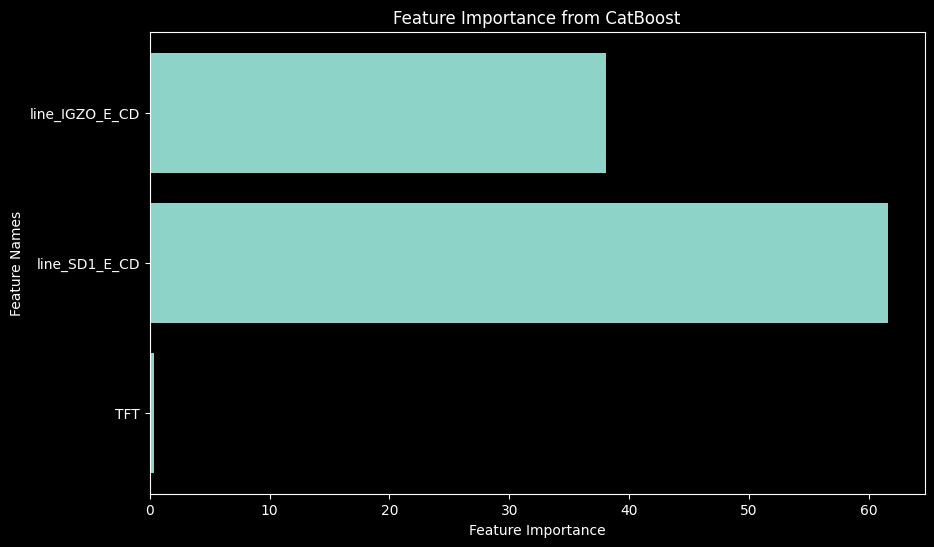

In [554]:
# Оценка важности признаков
feature_importance = model.get_feature_importance(type="FeatureImportance")

# Получение названий признаков
feature_names = X_test

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance from CatBoost')
plt.show()

# **Анализ таблицы по перепаду среднего оптического значения**

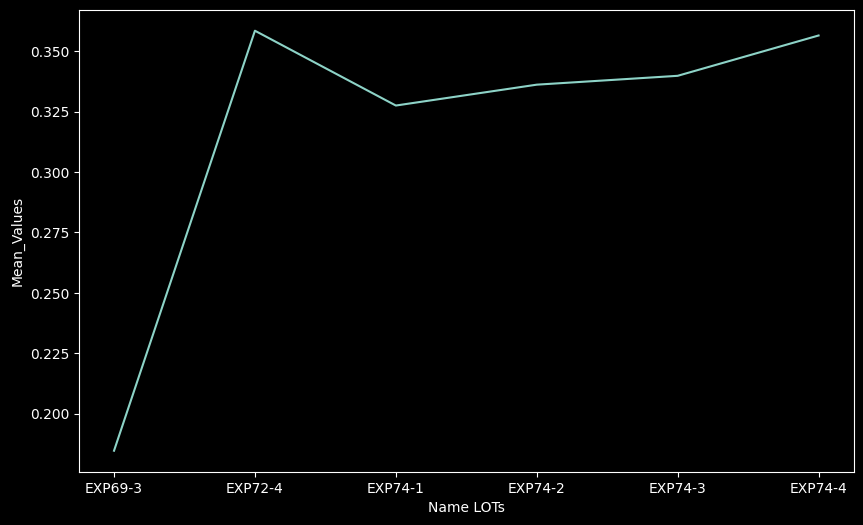

In [452]:
df_EXP69_3 = df[df['Lot-panel'] == 'EXP69-3']
df_EXP72_4 = df[df['Lot-panel'] == 'EXP72-4']
df_EXP74_1 = df[df['Lot-panel'] == 'EXP74-1']
df_EXP74_2 = df[df['Lot-panel'] == 'EXP74-2']
df_EXP74_3 = df[df['Lot-panel'] == 'EXP74-3']
df_EXP74_4 = df[df['Lot-panel'] == 'EXP74-4']

parameter1 = 'SS'

list_value1 = [df_EXP69_3[parameter1].mean(),
              df_EXP72_4[parameter1].mean(),
              df_EXP74_1[parameter1].mean(),
              df_EXP74_2[parameter1].mean(),
              df_EXP74_3[parameter1].mean(),
              df_EXP74_4[parameter1].mean()]


list_name = ['EXP69-3', 'EXP72-4', 'EXP74-1', 'EXP74-2', 'EXP74-3', 'EXP74-4']

offset = 0.2
plt.figure(figsize=(10, 6))
plt.plot(list_name, list_value1)
# plt.plot(list_name, list_value2)
plt.xlabel('Name LOTs')
plt.ylabel('Mean_Values')
plt.title('')
plt.show()

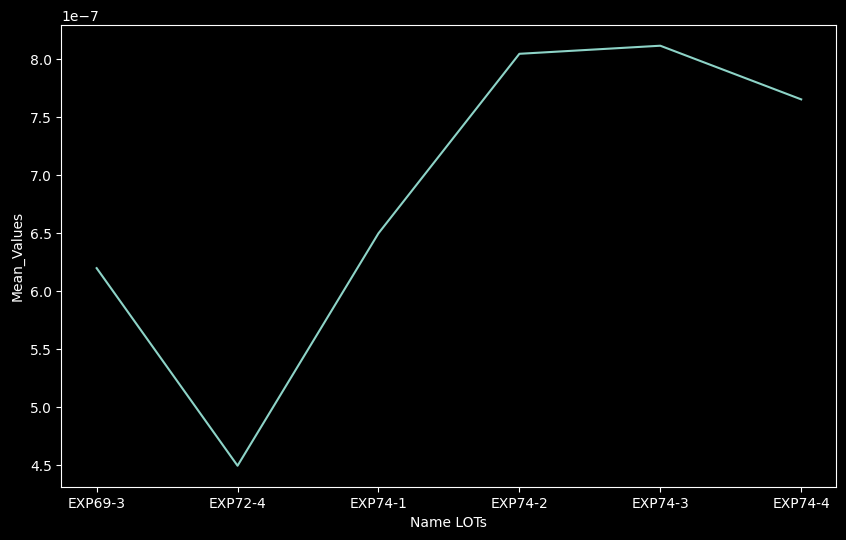

In [453]:
df_EXP69_3 = df[df['Lot-panel'] == 'EXP69-3']
df_EXP72_4 = df[df['Lot-panel'] == 'EXP72-4']
df_EXP74_1 = df[df['Lot-panel'] == 'EXP74-1']
df_EXP74_2 = df[df['Lot-panel'] == 'EXP74-2']
df_EXP74_3 = df[df['Lot-panel'] == 'EXP74-3']
df_EXP74_4 = df[df['Lot-panel'] == 'EXP74-4']

parameter1 = 'Id(Von+3V)'

list_value1 = [df_EXP69_3[parameter1].mean(),
              df_EXP72_4[parameter1].mean(),
              df_EXP74_1[parameter1].mean(),
              df_EXP74_2[parameter1].mean(),
              df_EXP74_3[parameter1].mean(),
              df_EXP74_4[parameter1].mean()]

parameter2 = 'Von'

list_value2 = [df_EXP69_3[parameter2].mean(),
              df_EXP72_4[parameter2].mean(),
              df_EXP74_1[parameter2].mean(),
              df_EXP74_2[parameter2].mean(),
              df_EXP74_3[parameter2].mean(),
              df_EXP74_4[parameter2].mean()]


list_name = ['EXP69-3', 'EXP72-4', 'EXP74-1', 'EXP74-2', 'EXP74-3', 'EXP74-4']

offset = 0.2
plt.figure(figsize=(10, 6))
plt.plot(list_name, list_value1)
# plt.plot(list_name, list_value2)
plt.xlabel('Name LOTs')
plt.ylabel('Mean_Values')
plt.title('')
plt.show()

In [454]:
# Задать свои уникальные данные для предсказания

# 'Measurement Structure': Capacitor GATE-SEMIA \ IGZO Serpentine
# 'TFT': 'Nominal' \ W10L5A

values = {'Lot-panel':'EXP69-3',
          'PEM': "X35-Y19",
          'Measurement Structure': 'Capacitor GATE-SEMIA',
          'TFT': 'Nominal',
          'Hyst': 0.199990,
          'Capasitance': 27.3,
          'Sheet resistance': 2.9,
          'VIA resistance': 774.0,
          'Resistance': 1366440.0,
          'Id(Von+3V)': 6.941280e-07,
          'SS': 0.377781,
          'Ioff': 1.482144e-13,
          'Cni': None,
          'Cox': 40.67,
          'res_mean_on_glass_SD1-E-CD': 5.273909,
          'result_SD1-E-CD': 1,
          'res_mean_on_glass_VI1-E-CD': 6.58992,
          'result_VI1-E-CD': 1,
          'res_mean_on_glass_ME1-E-CD': 4.889720,
          'result_ME1-E-CD': 1,
          'res_mean_on_glass_IGZO-E-CD': 5.223100,
          'result_IGZO-E-CD': 1,
          'err_result_SD1-E-CD': 0.7,
          'err_result_VI1-E-CD':-0.12,
          'err_result_ME1-E-CD':1.1,
          'err_result_IGZO-E-CD':0.001}
values.keys()


dict_keys(['Lot-panel', 'PEM', 'Measurement Structure', 'TFT', 'Hyst', 'Capasitance', 'Sheet resistance', 'VIA resistance', 'Resistance', 'Id(Von+3V)', 'SS', 'Ioff', 'Cni', 'Cox', 'res_mean_on_glass_SD1-E-CD', 'result_SD1-E-CD', 'res_mean_on_glass_VI1-E-CD', 'result_VI1-E-CD', 'res_mean_on_glass_ME1-E-CD', 'result_ME1-E-CD', 'res_mean_on_glass_IGZO-E-CD', 'result_IGZO-E-CD', 'err_result_SD1-E-CD', 'err_result_VI1-E-CD', 'err_result_ME1-E-CD', 'err_result_IGZO-E-CD'])

In [455]:
test_df = pd.DataFrame(data = values, index=[1])
test_df

,Lot-panel,PEM,Measurement Structure,TFT,Hyst,Capasitance,Sheet resistance,VIA resistance,Resistance,Id(Von+3V),SS,Ioff,Cni,Cox,res_mean_on_glass_SD1-E-CD,result_SD1-E-CD,res_mean_on_glass_VI1-E-CD,result_VI1-E-CD,res_mean_on_glass_ME1-E-CD,result_ME1-E-CD,res_mean_on_glass_IGZO-E-CD,result_IGZO-E-CD,err_result_SD1-E-CD,err_result_VI1-E-CD,err_result_ME1-E-CD,err_result_IGZO-E-CD
1,EXP69-3,X35-Y19,Capacitor GATE-SEMIA,Nominal,0.19999,27.3,2.9,774.0,1366440.0,6.941280e-07,0.377781,1.482144e-13,None,40.67,5.273909,1,6.58992,1,4.88972,1,5.2231,1,0.7,-0.12,1.1,0.001


In [456]:
# res = model.predict(test_df[X_test])
# print('Von = ', res)
# df.loc[[num]]

# **Аналоговый анализ**

EXP74-1 и EXP69-3

In [457]:
# Среднее соотношение значений по Von
(abs(df[df['Lot-panel']=='EXP74-1']['Von'].mean() / df[df['Lot-panel']=='EXP69-3']['Von'].mean()))

2.019859687228792

In [458]:
# Медиальное соотношение значений по Von
(abs(df[df['Lot-panel']=='EXP74-1']['Von'].median() / df[df['Lot-panel']=='EXP69-3']['Von'].median()))

2.990548149363232

In [459]:
# Соотношение средних значений
resist = df[df['Lot-panel']=='EXP74-1']['Resistance'].mean() / df[df['Lot-panel']=='EXP69-3']['Resistance'].mean()
via_resist = df[df['Lot-panel']=='EXP74-1']['VIA resistance'].mean() / df[df['Lot-panel']=='EXP69-3']['VIA resistance'].mean()
sheet_resist = df[df['Lot-panel']=='EXP74-1']['Sheet resistance'].mean() / df[df['Lot-panel']=='EXP69-3']['Sheet resistance'].mean()
res_mean = {'Resistance': resist, 'VIA resistance': via_resist, 'Sheet resistance': sheet_resist}
res_mean

{'Resistance': 1.0902672580485882,
 'VIA resistance': 1.0560897315925535,
 'Sheet resistance': 1.2303219985731584}

In [460]:
# Соотношение медиальных значений
resist = df[df['Lot-panel']=='EXP74-1']['Resistance'].median() / df[df['Lot-panel']=='EXP69-3']['Resistance'].median()
via_resist = df[df['Lot-panel']=='EXP74-1']['VIA resistance'].median() / df[df['Lot-panel']=='EXP69-3']['VIA resistance'].median()
sheet_resist = df[df['Lot-panel']=='EXP74-1']['Sheet resistance'].median() / df[df['Lot-panel']=='EXP69-3']['Sheet resistance'].median()
res_median = {'Resistance': resist, 'VIA resistance': via_resist, 'Sheet resistance': sheet_resist}
res_median

{'Resistance': 1.0582757852528404,
 'VIA resistance': 0.9922279792746114,
 'Sheet resistance': 2.3778682457438935}

In [461]:
# Получаю манимальное, среднее и максимальное значение по EXP69-3
value = 'Resistance'
lot_name = 'EXP69-3'
(df[df['Lot-panel']==lot_name][value].min(), df[df['Lot-panel']==lot_name][value].mean(), df[df['Lot-panel']==lot_name][value].max())

(1189390.0, 1406938.4251968504, 8415160.0)

In [462]:
# Получаю манимальное, среднее и максимальное значение по EXP74-1
lot_name = 'EXP74-1'
(df[df['Lot-panel']==lot_name][value].min(), df[df['Lot-panel']==lot_name][value].mean(), df[df['Lot-panel']==lot_name][value].max())

(1331320.0, 1533938.8990825687, 9209680.0)

In [463]:
df[df['Lot-panel'] == 'EXP74-1']['Cni']

21060   NaN
21061   NaN
21062   NaN
21063   NaN
21064   NaN
         ..
26723   NaN
26724   NaN
26725   NaN
26726   NaN
26727   NaN
Name: Cni, Length: 5668, dtype: float64

EXP74-1 и EXP74-3

In [464]:
(abs(df[df['Lot-panel']=='EXP74-1']['Von'].mean() / df[df['Lot-panel']=='EXP74-3']['Von'].mean()))

3.1841725456947634

In [465]:
(abs(df[df['Lot-panel']=='EXP74-1']['Von'].median() / df[df['Lot-panel']=='EXP74-3']['Von'].median()))

5.955752946201951

In [466]:
# Соотношение средних значений
resist = df[df['Lot-panel']=='EXP74-1']['Resistance'].mean() / df[df['Lot-panel']=='EXP74-3']['Resistance'].mean()
via_resist = df[df['Lot-panel']=='EXP74-1']['VIA resistance'].mean() / df[df['Lot-panel']=='EXP74-3']['VIA resistance'].mean()
sheet_resist = df[df['Lot-panel']=='EXP74-1']['Sheet resistance'].mean() / df[df['Lot-panel']=='EXP74-3']['Sheet resistance'].mean()
res_mean = {'Resistance': resist, 'VIA resistance': via_resist, 'Sheet resistance': sheet_resist}
res_mean

{'Resistance': 1.1033418323544655,
 'VIA resistance': 1.0181900894906233,
 'Sheet resistance': 0.8608742121643451}

In [467]:
resist = df[df['Lot-panel']=='EXP74-1']['Resistance'].median() / df[df['Lot-panel']=='EXP74-3']['Resistance'].median()
via_resist = df[df['Lot-panel']=='EXP74-1']['VIA resistance'].median() / df[df['Lot-panel']=='EXP74-3']['VIA resistance'].median()
sheet_resist = df[df['Lot-panel']=='EXP74-1']['Sheet resistance'].median() / df[df['Lot-panel']=='EXP74-3']['Sheet resistance'].median()
res_median = {'Resistance': resist, 'VIA resistance': via_resist, 'Sheet resistance': sheet_resist}
res_median

{'Resistance': 1.116544710988546,
 'VIA resistance': 1.0683403068340307,
 'Sheet resistance': 1.1201185495118549}